In [1]:
import pandas as pd

generated_mixtures = pd.read_csv("Mixtures/mixture_definition_in-silico_100000.csv")
# Load only Mixture A (odd numbered Mixture Label)
generated_mixtures = generated_mixtures[generated_mixtures["Mixture Label"]%2==1]
generated_mixtures
# # smiles_generated_mixtures = map_cid_to_smiles(generated_mixtures,cid_to_smiles)
# # display(generated_mixtures.head())
# smiles_generated_mixtures.head()

,Dataset,Mixture Label,CID,CID.1,CID.2,CID.3,CID.4,CID.5,CID.6,CID.7,CID.8,CID.9
0,in-silico,1,4133,454,6054,240,24915,8025,11002,10430,957,7710
2,in-silico,3,8129,10890,7762,8051,12180,11509,8148,12178,15380,8858
4,in-silico,5,11552,10722,31272,62444,31276,19310,240,7762,12180,61016
6,in-silico,7,62336,7654,6054,6184,454,8103,18827,62444,5281168,443158
8,in-silico,9,62433,10722,7714,261,10890,14286,240,61138,180,26331
...,...,...,...,...,...,...,...,...,...,...,...,...
199762,in-silico,199763,10976,440967,14286,12367,22386,8051,31252,12180,22201,26331
199764,in-silico,199765,7460,7150,22386,22201,12020,31252,22873,7770,8635,6654
199766,in-silico,199767,31265,2758,8103,440967,12232,6184,7762,3314,8051,8118
199768,in-silico,199769,62465,10882,7460,454,31272,957,93009,31252,22201,7165


In [2]:
from tqdm.notebook import tqdm
tqdm.pandas(smoothing=0)

cid_cols = [c for c in generated_mixtures.columns if c.startswith("CID")]
generated_mixtures["Mixture CIDs"] = generated_mixtures.progress_apply(lambda r: r[cid_cols].tolist(), axis=1)
generated_mixtures

  0%|          | 0/99886 [00:00<?, ?it/s]

,Dataset,Mixture Label,CID,CID.1,CID.2,CID.3,CID.4,CID.5,CID.6,CID.7,CID.8,CID.9,Mixture CIDs
0,in-silico,1,4133,454,6054,240,24915,8025,11002,10430,957,7710,"[4133, 454, 6054, 240, 24915, 8025, 11002, 104..."
2,in-silico,3,8129,10890,7762,8051,12180,11509,8148,12178,15380,8858,"[8129, 10890, 7762, 8051, 12180, 11509, 8148, ..."
4,in-silico,5,11552,10722,31272,62444,31276,19310,240,7762,12180,61016,"[11552, 10722, 31272, 62444, 31276, 19310, 240..."
6,in-silico,7,62336,7654,6054,6184,454,8103,18827,62444,5281168,443158,"[62336, 7654, 6054, 6184, 454, 8103, 18827, 62..."
8,in-silico,9,62433,10722,7714,261,10890,14286,240,61138,180,26331,"[62433, 10722, 7714, 261, 10890, 14286, 240, 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199762,in-silico,199763,10976,440967,14286,12367,22386,8051,31252,12180,22201,26331,"[10976, 440967, 14286, 12367, 22386, 8051, 312..."
199764,in-silico,199765,7460,7150,22386,22201,12020,31252,22873,7770,8635,6654,"[7460, 7150, 22386, 22201, 12020, 31252, 22873..."
199766,in-silico,199767,31265,2758,8103,440967,12232,6184,7762,3314,8051,8118,"[31265, 2758, 8103, 440967, 12232, 6184, 7762,..."
199768,in-silico,199769,62465,10882,7460,454,31272,957,93009,31252,22201,7165,"[62465, 10882, 7460, 454, 31272, 957, 93009, 3..."


In [3]:
def overlap(list1: list[str], list2: list[str]) -> float:
    assert len(list1) == len(list2), "Lists must be the same length."
    set1, set2 = set(list1), set(list2)
    intersection = set1 & set2
    return len(intersection)

ex1, ex2 = generated_mixtures.iloc[0]["Mixture CIDs"], generated_mixtures.iloc[1]["Mixture CIDs"]
ex1, ex2, overlap(ex1, ex2)

([4133, 454, 6054, 240, 24915, 8025, 11002, 10430, 957, 7710],
 [8129, 10890, 7762, 8051, 12180, 11509, 8148, 12178, 15380, 8858],
 0)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_set(mixtures: list[list[str]]) -> np.ndarray:
    n = len(mixtures)
    similarities = np.zeros((n, n))
    for i in range(n):
        similarities[i, i] = SAMPLE_SIZE
        for j in range(i + 1, n):
            sim = overlap(mixtures[i], mixtures[j])
            similarities[i, j] = sim
            similarities[j, i] = sim
    return similarities

def score_matrix(similarity_matrix: np.ndarray) -> float:
    n = similarity_matrix.shape[0]
    mask = ~np.eye(n, dtype=bool)
    return similarity_matrix[mask].mean() if np.any(mask) else 0.0


SAMPLE_SIZE = 10

ex_set = generated_mixtures["Mixture CIDs"].sample(SAMPLE_SIZE).tolist()
ex_score = evaluate_set(ex_set)
score_matrix(ex_score)

1.3111111111111111

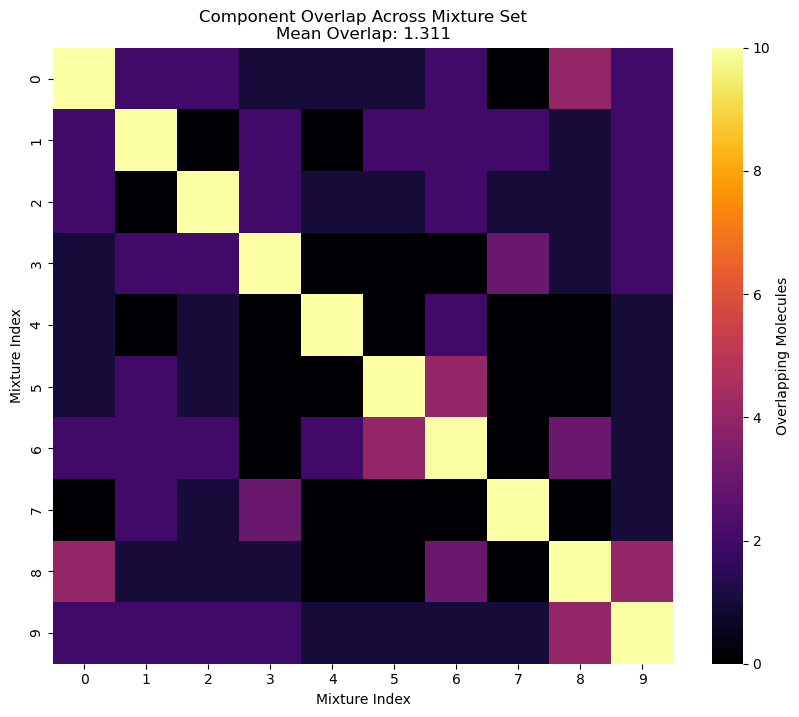

In [5]:
def plot_similarity_heatmap(similarity_matrix: np.ndarray):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, vmin=0, vmax=SAMPLE_SIZE, cmap='inferno', cbar_kws={'label': 'Overlapping Molecules'})
    plt.title(f"Component Overlap Across Mixture Set\nMean Overlap: {score_matrix(similarity_matrix):.3f}")
    plt.xlabel("Mixture Index")
    plt.ylabel("Mixture Index")
    return plt
    
ex_plt = plot_similarity_heatmap(ex_score)
ex_plt.show()

In [ ]:
best_set = None
best_score = float('inf')
score_plot = []

ITERS = 9_000_000
# ITERS = 10

for i in tqdm(range(ITERS), smoothing=0):
    set_i = generated_mixtures.sample(SAMPLE_SIZE)
    matrix_i = evaluate_set(set_i["Mixture CIDs"].tolist())
    score_i = score_matrix(matrix_i)

    if score_i < best_score:
        best_score = score_i
        best_set = set_i
    
    score_plot.append(best_score)

print(f"Best score: {best_score}")
best_set

  0%|          | 0/9000000 [00:00<?, ?it/s]

In [ ]:
best_plt = plot_similarity_heatmap(evaluate_set(best_set["Mixture CIDs"].tolist())) 

fname = f"Mixtures/mixture_a_{int(best_score*1000)}"
best_set.drop(columns="Mixture CIDs").to_csv(f"{fname}.csv")
best_plt.savefig(f"{fname}.png")

best_plt.show()

In [ ]:
plt.plot(score_plot)
plt.title("Best Score at Iteration")
plt.xscale('log')
plt.show()